Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.

### Install libraries and initiate a frozen lake map

In [ ]:
# Install gymnasium game environment
!pip install gymnasium
!pip install gymnasium[toy-text]

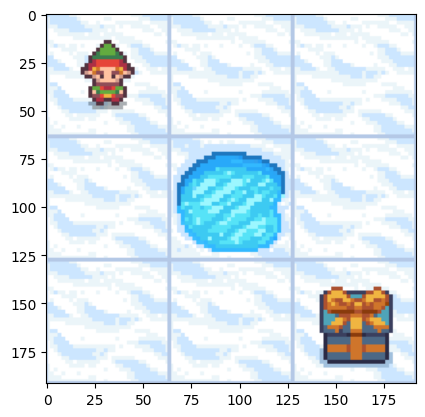

In [ ]:
# Load libraries
import gymnasium as gym
import matplotlib.pyplot as plt

# Define environment map
custom_map = [
    'SFF',
    'FHF',
    'FFG'
]

# Initialize the environment\
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=False, render_mode='rgb_array')
state_size = env.observation_space.n    # Number of states
action_size = env.action_space.n    # Number of actions of this game: four, 0: left, 1:down, 2: right, 3: up.
env.reset()    # Reset environment, i.e., set agent position to state 0
plt.imshow(env.render())    # Visualize environment map

##Main Code

In [ ]:
# Import necessary libraries
import numpy as np
import random
import time
from IPython.display import clear_output
import matplotlib
from keras.optimizers import Adam
import imageio
import pandas as pd

In [ ]:
# Define agent attibutes and methods
class Agent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size    # Number of states
        self.action_size =  action_size    # Number of possible actions the agent can take: four, 0: left, 1:down, 2: right, 3: up.

    # Save model
    def save_model(self, name):
        self.model.save_weights(name)

    # Load model
    def load_model(self, name):
        self.model.load_weights(name)

# Initialize a reinforcement learning agent
agent = Agent(state_size, action_size)

In [ ]:
# Initialize Q_table
q_table = np.zeros((state_size, action_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Set up variables
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [ ]:
# Q-learning algorithm
rewards_all_episodes = []

for episode in range(num_episodes):
  state = env.reset()[0]

  done = False
  rewards_current_episode = 0

  for step in range(max_steps_per_episode):

    # Exploration-exploitation trade-off
    exploration_rate_threshold = random.uniform(0,1)
    if exploration_rate_threshold > exploration_rate:
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    new_state, reward, done, info, _ = env.step(action)

    # Q_learning update
    q_table[state, action] = q_table[state, action]*(1-learning_rate)+learning_rate*(reward+discount_rate*np.max(q_table[new_state, :]))

    state = new_state
    rewards_current_episode += reward

    if done == True:
      break

  # Exploration rate decay
  exploration_rate = min_exploration_rate+(max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)

  rewards_all_episodes.append(rewards_current_episode)

In [ ]:
# Print out the rewards after every 1000 episodes
rewards_per_thousand_episodes = np.array_split(np.array(rewards_all_episodes), num_episodes/1000)
print("____Average reward per thousand episodes_______")
count = 1000
for r in rewards_per_thousand_episodes:
  print("Episode", count, ":", str(sum(r/1000)))
  count += 1000

____Average reward per thousand episodes_______
Episode 1000 : 0.5190000000000003
Episode 2000 : 0.8700000000000007
Episode 3000 : 0.9450000000000007
Episode 4000 : 0.9790000000000008
Episode 5000 : 0.9830000000000008
Episode 6000 : 0.9940000000000008
Episode 7000 : 0.9870000000000008
Episode 8000 : 0.9970000000000008
Episode 9000 : 0.9930000000000008
Episode 10000 : 0.9930000000000008


In [ ]:
print("________Q-table________")
print(q_table)

________Q-table________
[[0.96059601 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.92916993 0.93850669]
 [0.76358896 0.96747758 0.78220262 0.82396001]
 [0.970299   0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.         0.99363731 0.76641913 0.59904421]
 [0.9801     0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.        ]
 [0.         0.         0.         0.        ]]


In [ ]:
# Print the optimal policy
for state_index in range(len(q_table)):
  best_action = np.argmax(q_table[state_index])
  print("State " + str(state_index) + ", Best action: " + str(best_action))

State 0, Best action: 1
State 1, Best action: 0
State 2, Best action: 1
State 3, Best action: 1
State 4, Best action: 0
State 5, Best action: 1
State 6, Best action: 2
State 7, Best action: 2
State 8, Best action: 0


In [ ]:
# Test an episode
state = env.reset()    # Reset environment, i.e., agent position is set to state 0
state_arr = np.zeros(agent.state_size)    # Initialze current state array, e.g., [0. 0. 0. 0. 0. 0. 0. 0. 0.]
state_arr[state[0]] = 1    # Set the agent position in the current state array, i.e., [1. 0. 0. 0. 0. 0. 0. 0. 0.]
state_arr = np.reshape(state_arr, [1, agent.state_size])    # Reshape array, e.g., [[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
terminated = False    # Initialize terminated to False
img_lst = [env.render()]    # Initialize list to store visualization frames
for state_index in range(len(q_table)):
  best_action = np.argmax(q_table[state_index])
  img = env.render()    # Render current environment image
  img_lst.append(img)    # Append environment images to make animation
  new_state, reward, terminated, info, _ = env.step(best_action)    # Perform the best action, get return from environment
  new_state_arr = np.zeros(agent.state_size)    # Initialze new state array, e.g., [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  new_state_arr[new_state] = 1    # Set the agent position in the new state array, after taking the action, e.g., [0. 1. 0. 0. 0. 0. 0. 0. 0.]
  new_state_arr = np.reshape(new_state_arr, [1, state_size])    # Reshape array, e.g., [[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
  state_arr = new_state_arr    # New state becomes state
  img = env.render()    # Render current environment image
  img_lst.append(img)    # Append environment images to make animation

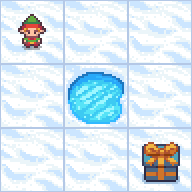

In [ ]:
imageio.mimsave('test.gif', img_lst, format='GIF', duration=0.5)
# Display test result animation
from IPython.display import Image
Image('test.gif')